# README

Download the raw data wither manually or via kaggle api

```python
!kaggle competitions download -c instacart-market-basket-analysis
```


In [ ]:
!mkidir data data/raw_data data/consumption_data
!cd data/raw_data
%pip install requirements.txt
# or download manually in the raw_data sub directory
!kaggle competitions download -c instacart-market-basket-analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
orders_df = pd.read_csv('../data/raw_data/orders.csv')
order_products_prior = pd.read_csv('../data/raw_data/order_products__prior.csv')
order_products_train = pd.read_csv('../data/raw_data/order_products__train.csv')
df_products = pd.read_csv('../data/raw_data/products.csv')
df_aisles = pd.read_csv('../data/raw_data/aisles.csv')
df_departments = pd.read_csv('../data/raw_data/departments.csv')

In [4]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
orders_df[orders_df['eval_set']=='test']

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0
...,...,...,...,...,...,...,...
3420918,2728930,206202,test,23,2,17,6.0
3420929,350108,206204,test,5,4,14,14.0
3421001,1043943,206206,test,68,0,20,0.0
3421018,2821651,206207,test,17,2,13,14.0


In [29]:
orders_df[orders_df['eval_set']=='prior'].shape[0]

3214874

In [30]:
orders_df[orders_df['eval_set']=='train'].shape[0]

131209

In [31]:
orders_df[orders_df['eval_set']=='test'].shape[0]

75000

In [3]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1.0,1.0
1,2,28985,2.0,1.0
2,2,9327,3.0,0.0
3,2,45918,4.0,1.0
4,2,30035,5.0,0.0


In [4]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [33]:
df_products.shape

(49688, 4)

In [6]:
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


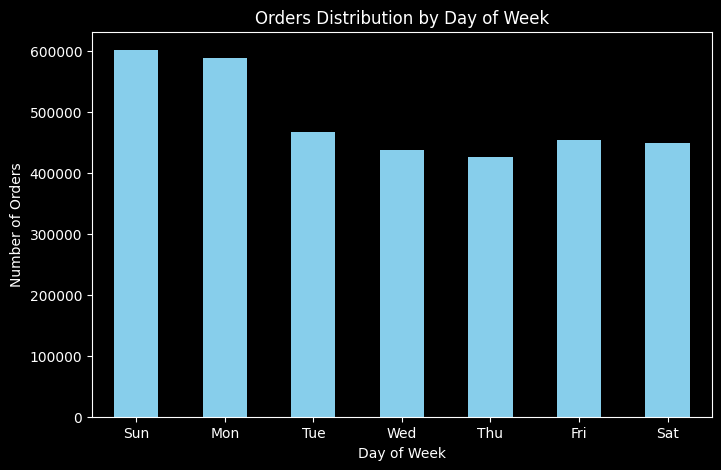

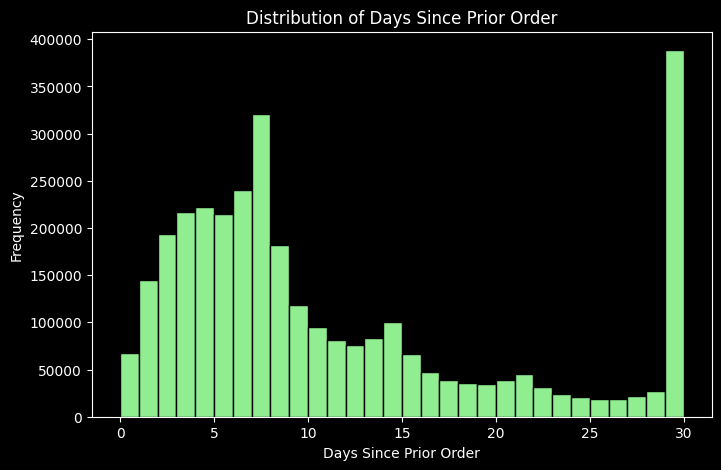

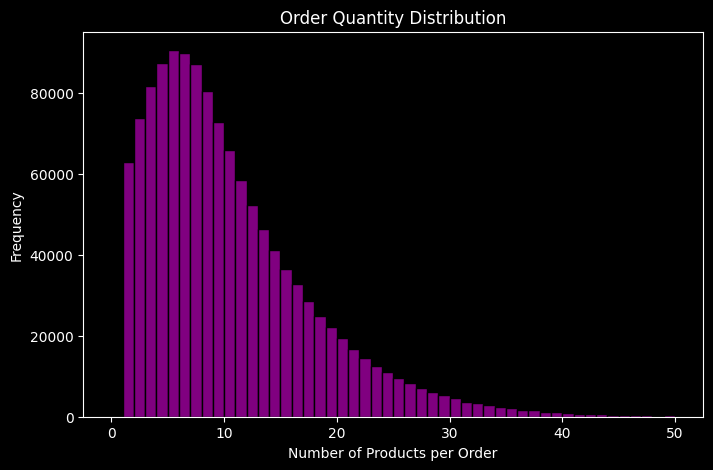

<Figure size 1000x600 with 0 Axes>

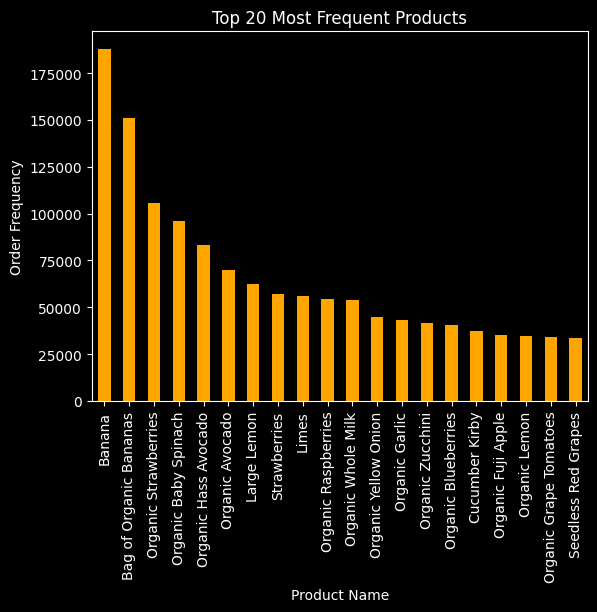

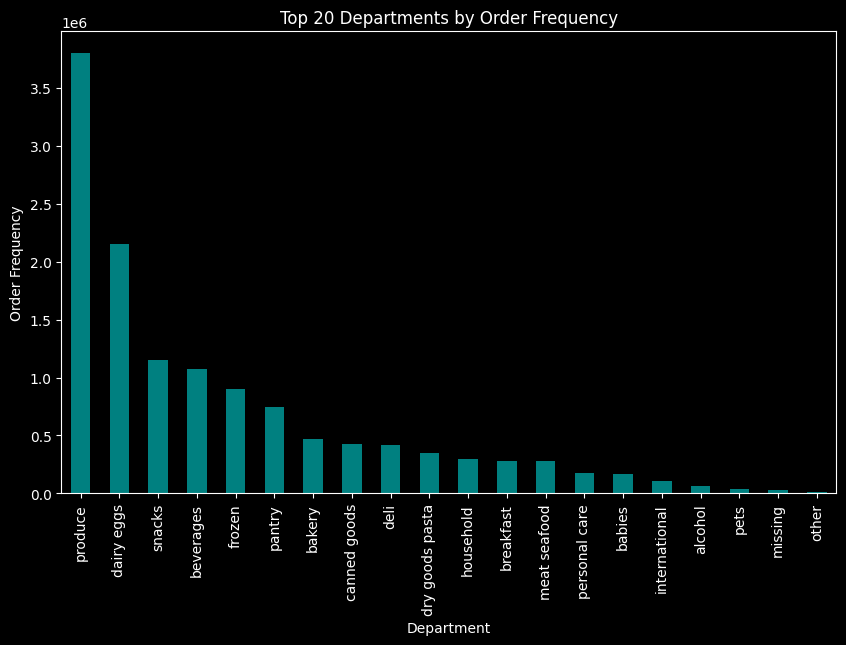

In [8]:
# 1) Day of Week (DOW) distribution
def dow_distribution(orders_df):
    plt.figure(figsize=(8, 5))
    orders_df['order_dow'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Orders Distribution by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Orders')
    plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], rotation='horizontal')
    plt.show()

# 2) Days since prior order distribution
def days_since_prior_distribution(orders_df):
    plt.figure(figsize=(8, 5))
    orders_df['days_since_prior_order'].plot(kind='hist', bins=30, color='lightgreen', edgecolor='black')
    plt.title('Distribution of Days Since Prior Order')
    plt.xlabel('Days Since Prior Order')
    plt.ylabel('Frequency')
    plt.show()

# 3) Order quantity distribution (using order_products_prior and order_products_train dataframes)
def order_quantity_distribution(order_products_prior_df, order_products_train_df):
    order_quantity = pd.concat([order_products_prior_df, order_products_train_df]) \
                     .groupby('order_id')['product_id'].count()
    
    plt.figure(figsize=(8, 5))
    order_quantity.plot(kind='hist', bins=50, color='purple', edgecolor='black', range=(0,50))
    plt.title('Order Quantity Distribution')
    plt.xlabel('Number of Products per Order')
    plt.ylabel('Frequency')
    plt.show()

# 4) Product frequency in the orders
def product_frequency(order_products_prior_df, order_products_train_df, products_df):
    product_orders = pd.concat([order_products_prior_df, order_products_train_df])['product_id'].value_counts().head(20)
    product_orders = product_orders.reset_index()
    product_orders.columns = ['product_id', 'frequency']
    product_orders = product_orders.merge(products_df, on='product_id', how='left')
    
    plt.figure(figsize=(10, 6))
    product_orders.sort_values('frequency', ascending=False).plot(x='product_name', y='frequency', kind='bar', legend=False, color='orange')
    plt.title('Top 20 Most Frequent Products')
    plt.xlabel('Product Name')
    plt.ylabel('Order Frequency')
    plt.xticks(rotation=90)
    plt.show()

# 5) Department frequency
def department_frequency(order_products_prior_df, order_products_train_df, products_df, departments_df):
    department_orders = pd.concat([order_products_prior_df, order_products_train_df]) \
                        .merge(products_df, on='product_id', how='left') \
                        .merge(departments_df, on='department_id', how='left') \
                        .department.value_counts().head(20)
    
    plt.figure(figsize=(10, 6))
    department_orders.sort_values(ascending=False).plot(kind='bar', color='teal')
    plt.title('Top 20 Departments by Order Frequency')
    plt.xlabel('Department')
    plt.ylabel('Order Frequency')
    plt.xticks(rotation=90)
    plt.show()


dow_distribution(orders_df)
days_since_prior_distribution(orders_df)
order_quantity_distribution(order_products_prior, order_products_train)
product_frequency(order_products_prior, order_products_train, df_products)
department_frequency(order_products_prior, order_products_train, df_products, df_departments)

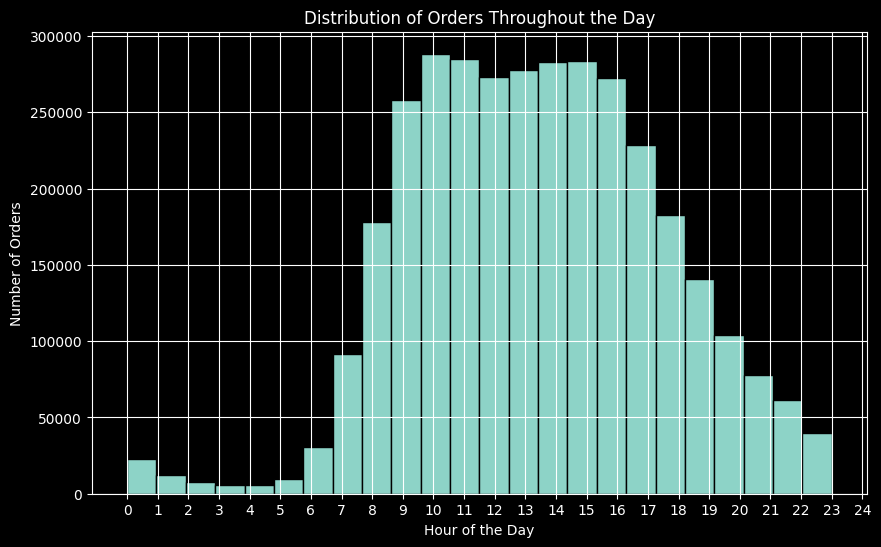

In [9]:
plt.figure(figsize=(10, 6))
orders_df['order_hour_of_day'].hist(bins=24, edgecolor='black')
plt.title('Distribution of Orders Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 25))
plt.show()

In [10]:
from scipy.sparse import coo_matrix

order_products = pd.concat([order_products_prior, order_products_train])


unique_orders = order_products['order_id'].unique()
unique_products = order_products['product_id'].unique()
order_indices = {o: i for i, o in enumerate(unique_orders)}
product_indices = {p: i for i, p in enumerate(unique_products)}
row_indices = order_products['order_id'].map(order_indices)
col_indices = order_products['product_id'].map(product_indices)

# adjacency matrix
order_product_adj_matrix = coo_matrix(
    (np.ones(len(order_products)), (row_indices, col_indices)),
    shape=(len(unique_orders), len(unique_products))
)


In [15]:
len(unique_orders)

1279158

In [16]:
len(unique_products)

49111

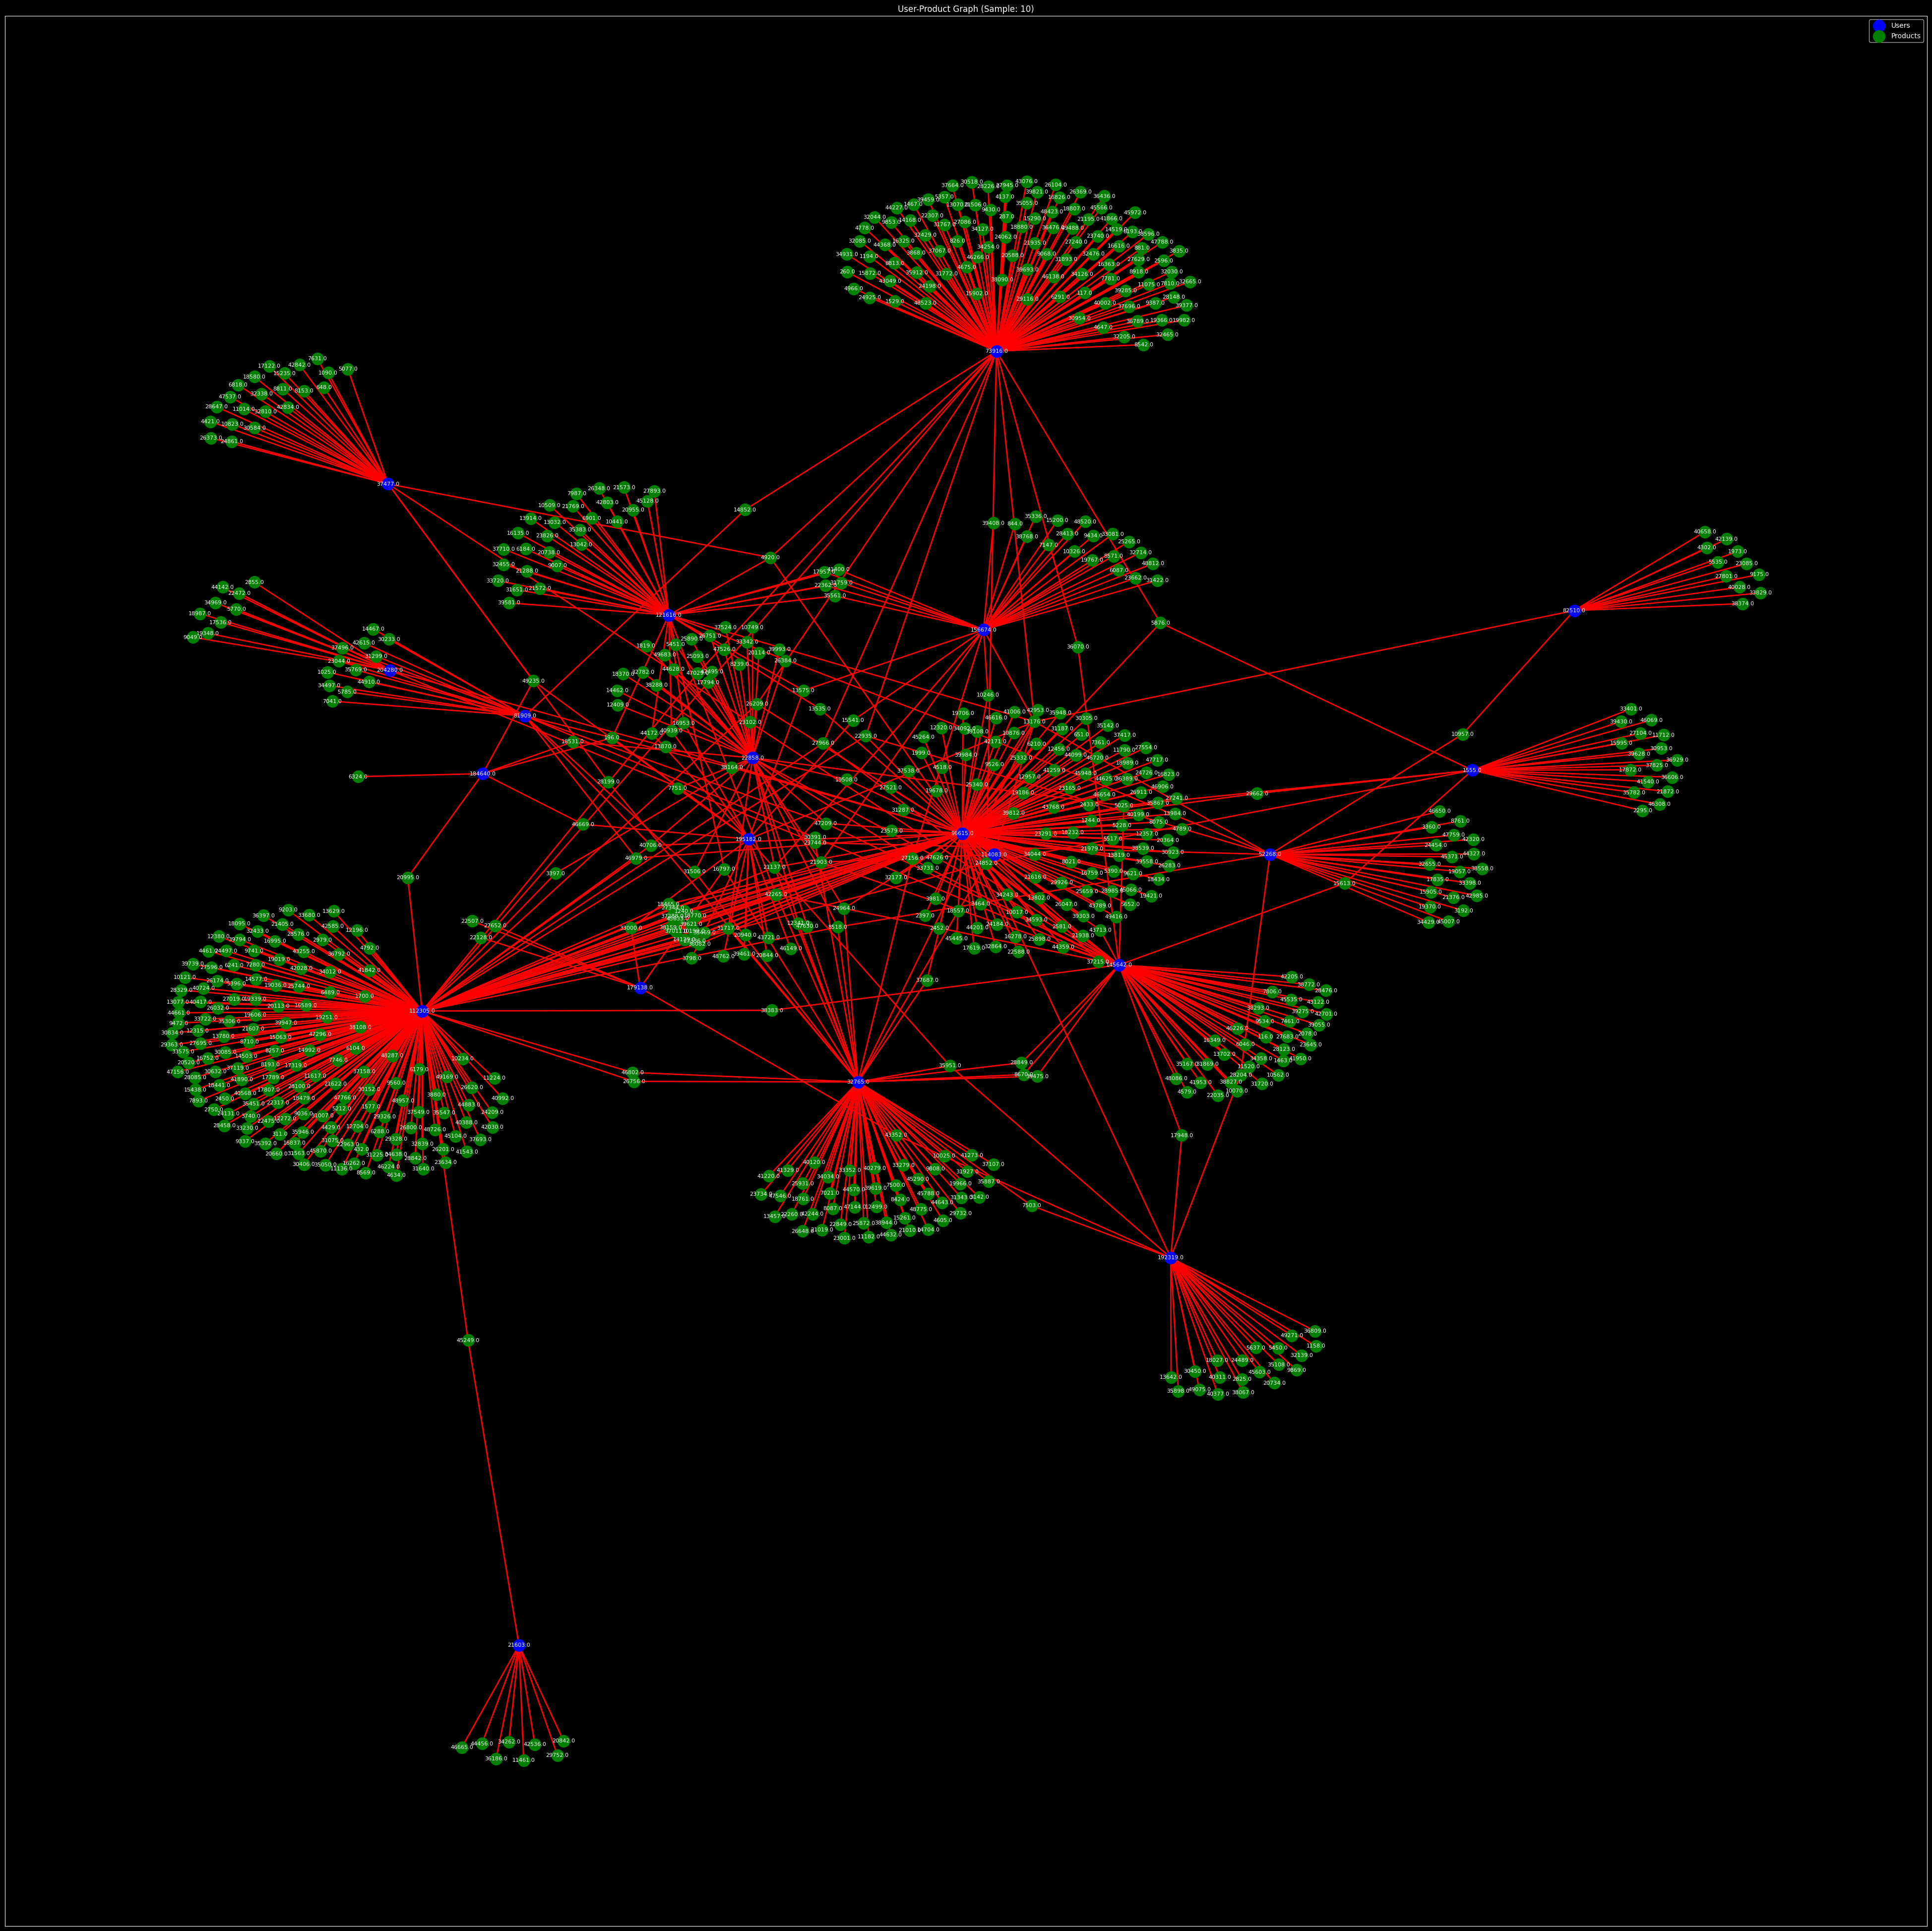

In [25]:
order_products = pd.concat([order_products_prior, order_products_train])

user_product_pairs = order_products.merge(orders_df[['order_id', 'user_id']], on='order_id')

sampled_users = np.random.choice(user_product_pairs['user_id'].unique(), size=20, replace=False)
sampled_data = user_product_pairs[user_product_pairs['user_id'].isin(sampled_users)]

# graph obj
G = nx.Graph()

for _, row in sampled_data.iterrows():
    G.add_node(row['user_id'], node_type='user')
    G.add_node(row['product_id'], node_type='product')
    G.add_edge(row['user_id'], row['product_id'])

plt.figure(figsize=(50, 50))
pos = nx.spring_layout(G, seed=42)  # Layout for the nodes

user_nodes = [n for n in G.nodes if G.nodes[n]['node_type'] == 'user']
product_nodes = [n for n in G.nodes if G.nodes[n]['node_type'] == 'product']
nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='blue', label='Users')
nx.draw_networkx_nodes(G, pos, nodelist=product_nodes, node_color='green', label='Products')

nx.draw_networkx_edges(G, pos, width=2, edge_color='red')
nx.draw_networkx_labels(G, pos, font_size=8, font_color='white')  # Change font color for visibility
plt.legend()

plt.title("User-Product Graph (Sample: 10)")
plt.show()

# Conclusion from above

- we can see certain communities
- can we use time of week?
- hour purchased
- how are we going to deal with memory
- can we combine models for dimensionality reduction?
  - Apriori first, then GAT/GNN
    - 